In [1]:
import tensorflow as tf
import keras
import matplotlib as plt
import seaborn as sb
import pandas as pd
import numpy as np
import scipy as sy
import pickle
from tensorflow.keras import regularizers

In [2]:
file_train = open("Data/train_dataset.pickle","rb")
trainingdata = pickle.load(file_train)
train_data, train_label = trainingdata["data"], trainingdata["label"]
train_data = np.asarray(train_data)

file_validation = open("Data/valid_dataset.pickle","rb")
validationdata = pickle.load(file_validation)
valid_data, valid_label = validationdata["data"], validationdata["label"]
valid_data = np.asarray(valid_data)

file_test = open("Data/test_dataset.pickle","rb")
testdata = pickle.load(file_test)
test_data, test_label = testdata["data"], testdata["label"]
test_data = np.asarray(test_data)

In [3]:
for idx, val in enumerate(train_label):
    if val == "male":
        train_label[idx] = 0
    else:
        train_label[idx] = 1
        
for idx, val in enumerate(test_label):
    if val == "male":
        test_label[idx] = 0
    else:
        test_label[idx] = 1
        
for idx, val in enumerate(valid_label):
    if val == "male":
        valid_label[idx] = 0
    else:
        valid_label[idx] = 1
        
train_label = train_label.astype(np.float32)
test_label = test_label.astype(np.float32)
valid_label = valid_label.astype(np.float32)

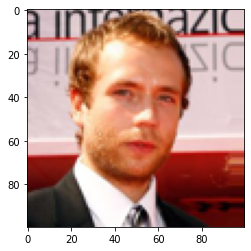

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[4, :, :, :])

# Converting RGB images into Grayscale

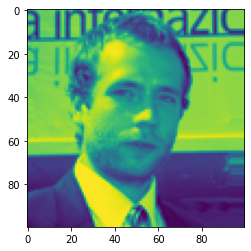

In [5]:
from skimage import color
color.rgb2gray(train_data[4, :, :, :])
plt.imshow(color.rgb2gray(train_data[4, :, :, :]))

# Augmenting Image Data

In [93]:
from keras.preprocessing.image import ImageDataGenerator

In [95]:
# Adding 4th dimension to train data
train_data = np.expand_dims(train_data, -1)
print(train_data.shape)

(11135, 100, 100, 1)


In [96]:
# Adding 4th dimension to validation data
valid_data = np.expand_dims(valid_data, -1)
print(valid_data.shape)

(1279, 100, 100, 1)


In [97]:
datagen = ImageDataGenerator(rotation_range=90, fill_mode="nearest")
datagen.fit(train_data)


In [33]:
file_train = open("data/train_dataset.pickle",'rb')
trainingdata = pickle.load(file_train)
train_data, train_label = trainingdata['data'], trainingdata['label']

file_validation = open("data/valid_dataset.pickle",'rb')
validationdata = pickle.load(file_validation)
valid_data, valid_label = validationdata['data'], validationdata['label']

train_data = np.stack(train_data, axis = 0)
valid_data = np.stack(valid_data, axis = 0)

le.fit(valid_label)
valid_label = le.transform(valid_label)

In [34]:
# Encode labels to 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_label)
train_label = le.transform(train_label)

le.fit(valid_label)
valid_label = le.transform(valid_label)

# Model

In [15]:
# create a sequential model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Input((100,100,3)))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [16]:
# Training the network
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit(train_data, train_label, validation_data=(valid_data, valid_label), batch_size = 64, epochs = 20, use_multiprocessing=True)
# test_loss, test_acc = model.evaluate(x = valid_data, y = valid_label)

Epoch 1/20
174/174 [==============================] - 27s 150ms/step - loss: 2.7664 - accuracy: 0.6451 - val_loss: 0.6402 - val_accuracy: 0.7631
Epoch 2/20
174/174 [==============================] - 26s 151ms/step - loss: 0.6071 - accuracy: 0.7535 - val_loss: 0.5360 - val_accuracy: 0.7826
Epoch 3/20
174/174 [==============================] - 26s 151ms/step - loss: 0.4895 - accuracy: 0.8110 - val_loss: 0.5068 - val_accuracy: 0.8155
Epoch 4/20
174/174 [==============================] - 26s 152ms/step - loss: 0.4155 - accuracy: 0.8481 - val_loss: 0.4454 - val_accuracy: 0.8350
Epoch 5/20
174/174 [==============================] - 26s 152ms/step - loss: 0.3517 - accuracy: 0.8768 - val_loss: 0.4519 - val_accuracy: 0.8327
Epoch 6/20
174/174 [==============================] - 26s 152ms/step - loss: 0.3009 - accuracy: 0.9007 - val_loss: 0.4436 - val_accuracy: 0.8460
Epoch 7/20
174/174 [==============================] - 26s 152ms/step - loss: 0.2597 - accuracy: 0.9224 - val_loss: 0.4784 - val_ac

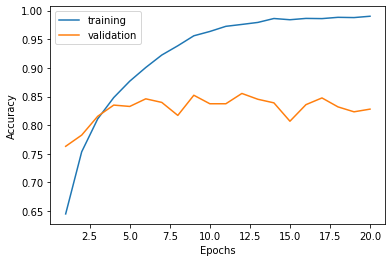

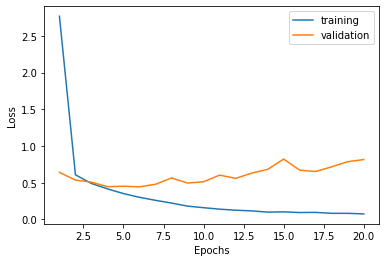

In [17]:
acc_history = history.history["accuracy"]
val_acc_history = history.history["val_accuracy"]

plt.plot(range(1, len(acc_history) + 1), acc_history)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training", "validation"])
plt.show()

loss_history = history.history["loss"]
val_loss_history = history.history["val_loss"]

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training", "validation"])
plt.show()